In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import numpy as np
import calendar

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import string
from num2words import num2words
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import os
import pickle 
import pathlib

def remove_preface(text: str):
    return '\n'.join(text.split('\n')[2:])

def remove_one_letter_words(text):
    words = word_tokenize(text)
    words = filter(lambda w: len(w) > 1, words)
    return ' '.join(words)

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words - {'no', 'not'}
    
    words = word_tokenize(text)
    words = filter(lambda w: w not in stop_words, words)
    return ' '.join(words)

def remove_links(text):
    reg =  re.compile(r'^http[s]?://.*[\r\n]*')

    words = word_tokenize(text)
    words = filter(lambda w: not reg.fullmatch(w), words)
    return ' '.join(words)

def nums_to_words(text):
    def num_to_word(word):
        return '' if int(word) < 1000000000000 else num2words(word) 
    
    words = word_tokenize(text)
    words = map(lambda w: num_to_word(w) if w.isdigit() else w, words)

    return ' '.join(words)

def to_lower(text):
    return ''.join(np.char.lower(text).tolist())

def remove_apostrophe(text):
    return ''.join(filter(lambda ch: ch != '\'', text))

def remove_punctuation(text):
    return ''.join(filter(lambda ch: ch not in string.punctuation, text))

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    words = map(lemmatizer.lemmatize, words)

    return ' '.join(words)

def preprocess(text):
    text = remove_preface(text)
    text = remove_punctuation(text)
    text = remove_apostrophe(text)
    text = remove_one_letter_words(text)
    text = remove_links(text)
    text = to_lower(text)
    text = remove_stopwords(text)
    text = nums_to_words(text)

    text = lemmatize(text)

    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text


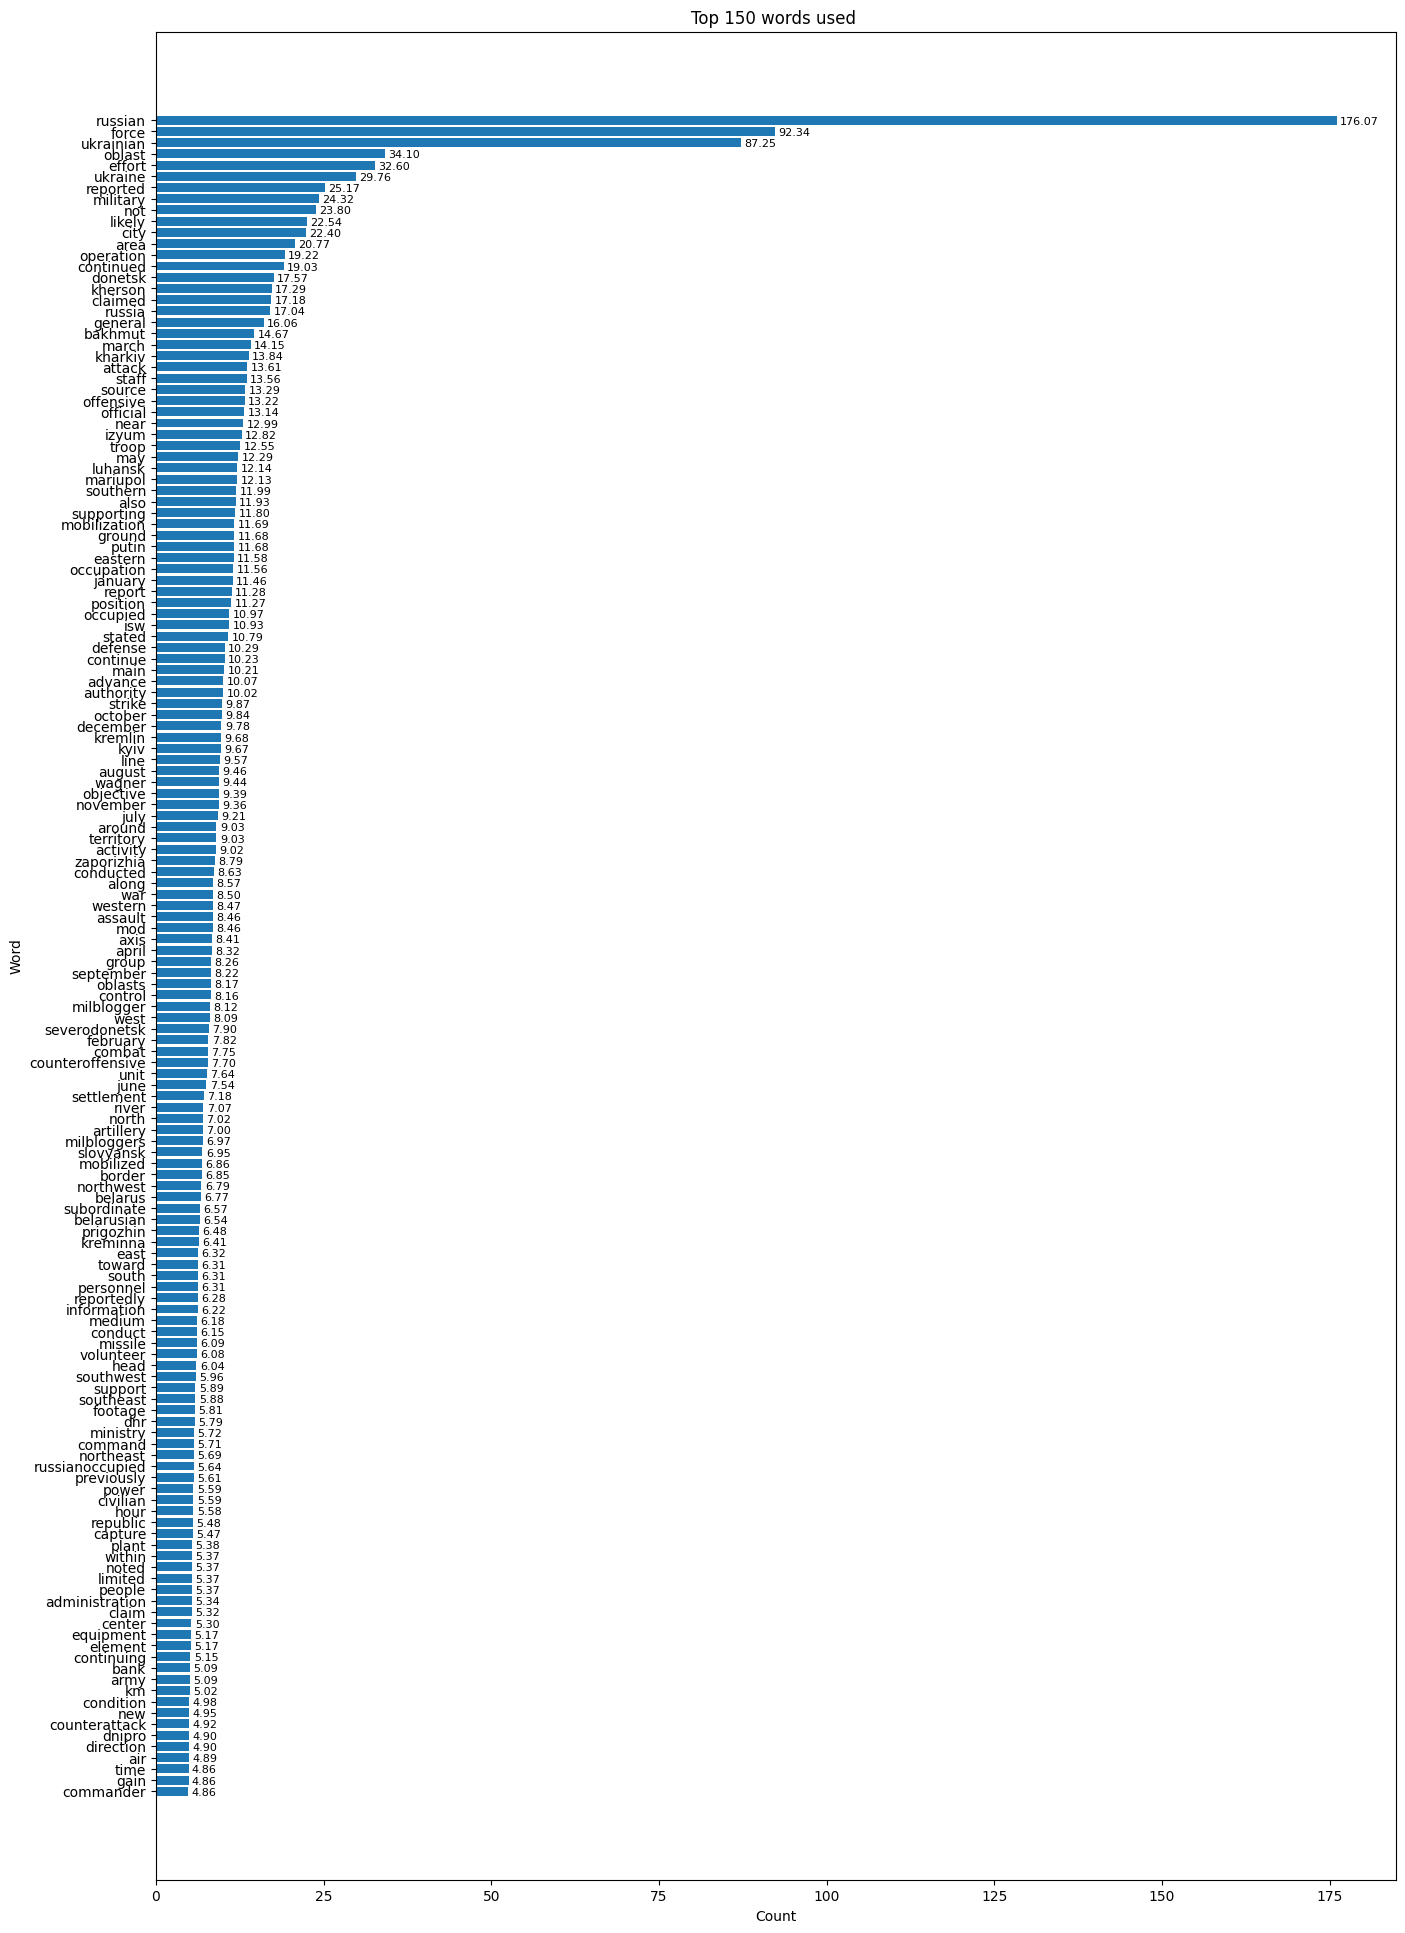

In [5]:
raw_txt_dir = f'data/isw_data_raw_text'
preprocessed_dir = f'data/isw_data_preprocessed'

preprocessed_texts = []
for filename in os.listdir(preprocessed_dir):
    f = os.path.join(preprocessed_dir, filename)
    with open(f, encoding = 'UTF-8') as fr:
        preprocessed_texts.append(fr.read())

cv = TfidfVectorizer()
word_count_v = cv.fit_transform(preprocessed_texts)

feature_names = cv.get_feature_names_out()
tfidf_sum = np.sum(word_count_v, axis=0)
tfidf_tuples = [(feature_names[i], tfidf_sum[0,i]) for i in range(len(feature_names))]
tfidf_tuples_sorted = sorted(tfidf_tuples, key=lambda x: x[1], reverse=True)[:150][::-1]

terms = [term for term, tfidf in tfidf_tuples_sorted]
values = [tfidf for term, tfidf in tfidf_tuples_sorted]

fig, ax = plt.subplots(figsize=(16, 24), dpi=100)
ax.barh(terms, values)

ax.set_title('Top 150 words used ')
for i, term in enumerate(values):
    label = format(round(term, 2), '.2f')
    ax.text(values[i] + 0.5, i - 0.35, f'{label}', color='black', fontsize=8)

plt.xlabel('Count')
plt.ylabel('Word')
plt.show()
